![tower_bridge](tower_bridge.jpg)

As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [33]:
# Run this cell to install mlflow
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [34]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("london_weather.csv")

# Start coding here
# Use as many cells as you like

In [35]:

# Load the dataset
# Use pandas to read the CSV file.
file_path = 'london_weather.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Explore the data
# Display the first few rows to understand the structure.
print(data.head())

# Get a summary of the dataset
# Check for missing values and data types.
print(data.info())

# Describe the numerical data
# This will give you stats like mean, median, and std deviation.
print(data.describe())


       date  cloud_cover  sunshine  ...  precipitation  pressure  snow_depth
0  19790101          2.0       7.0  ...            0.4  101900.0         9.0
1  19790102          6.0       1.7  ...            0.0  102530.0         8.0
2  19790103          5.0       0.0  ...            0.0  102050.0         4.0
3  19790104          8.0       0.0  ...            0.0  100840.0         2.0
4  19790105          6.0       2.0  ...            0.0  102250.0         1.0

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 n

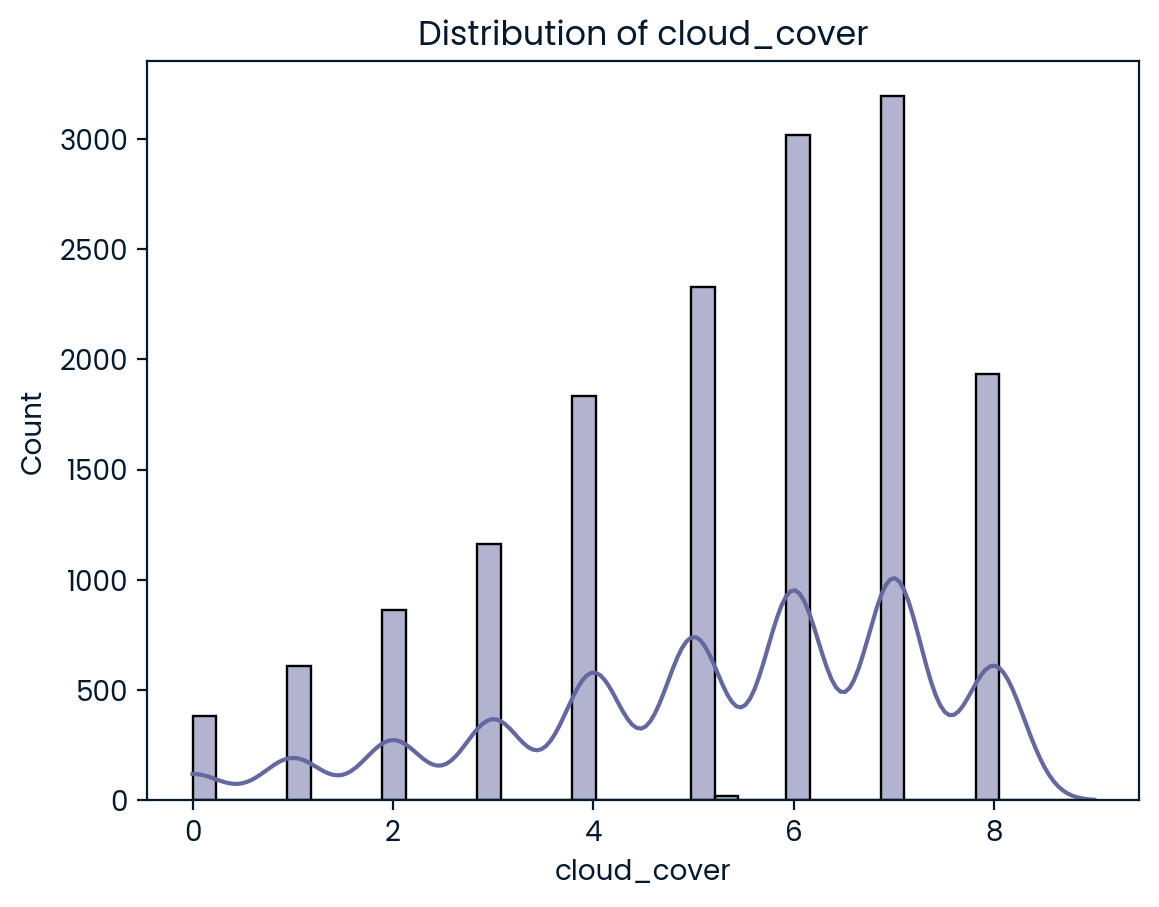

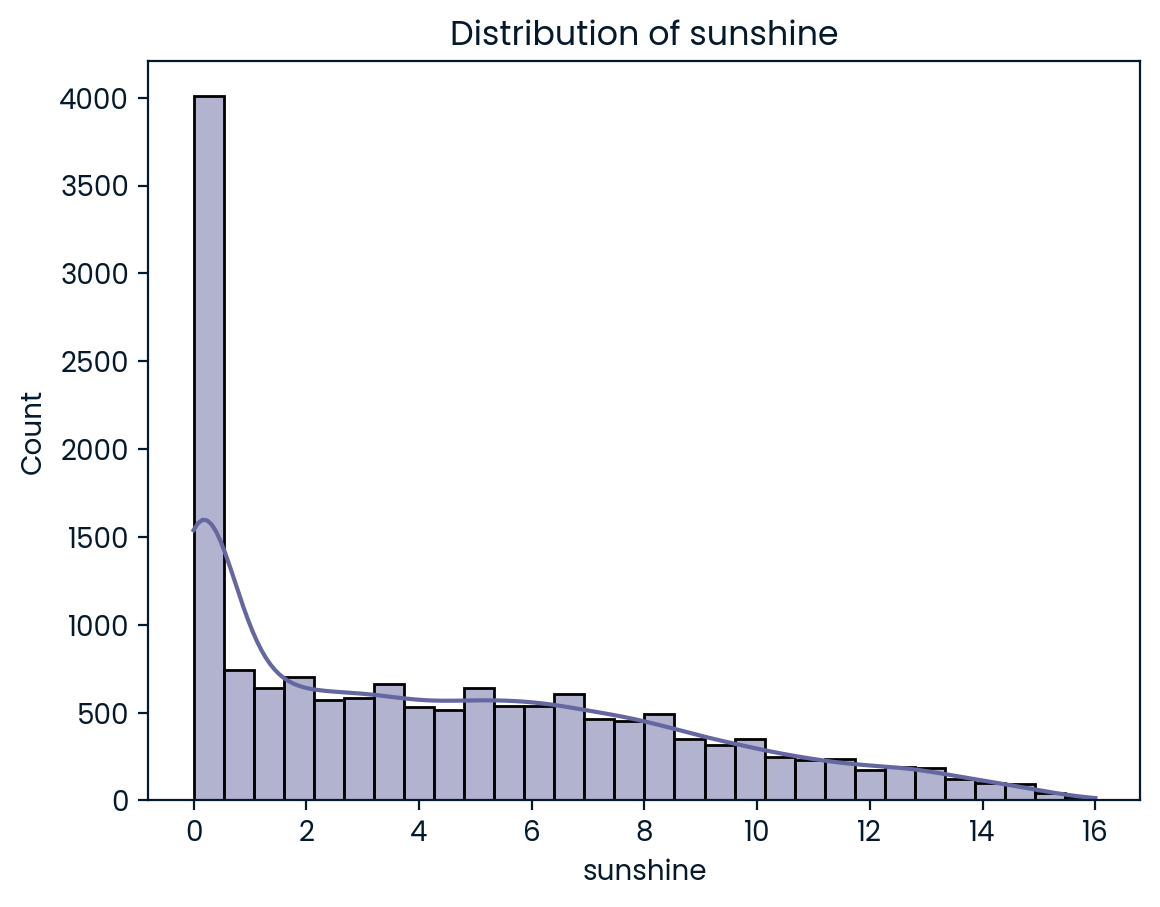

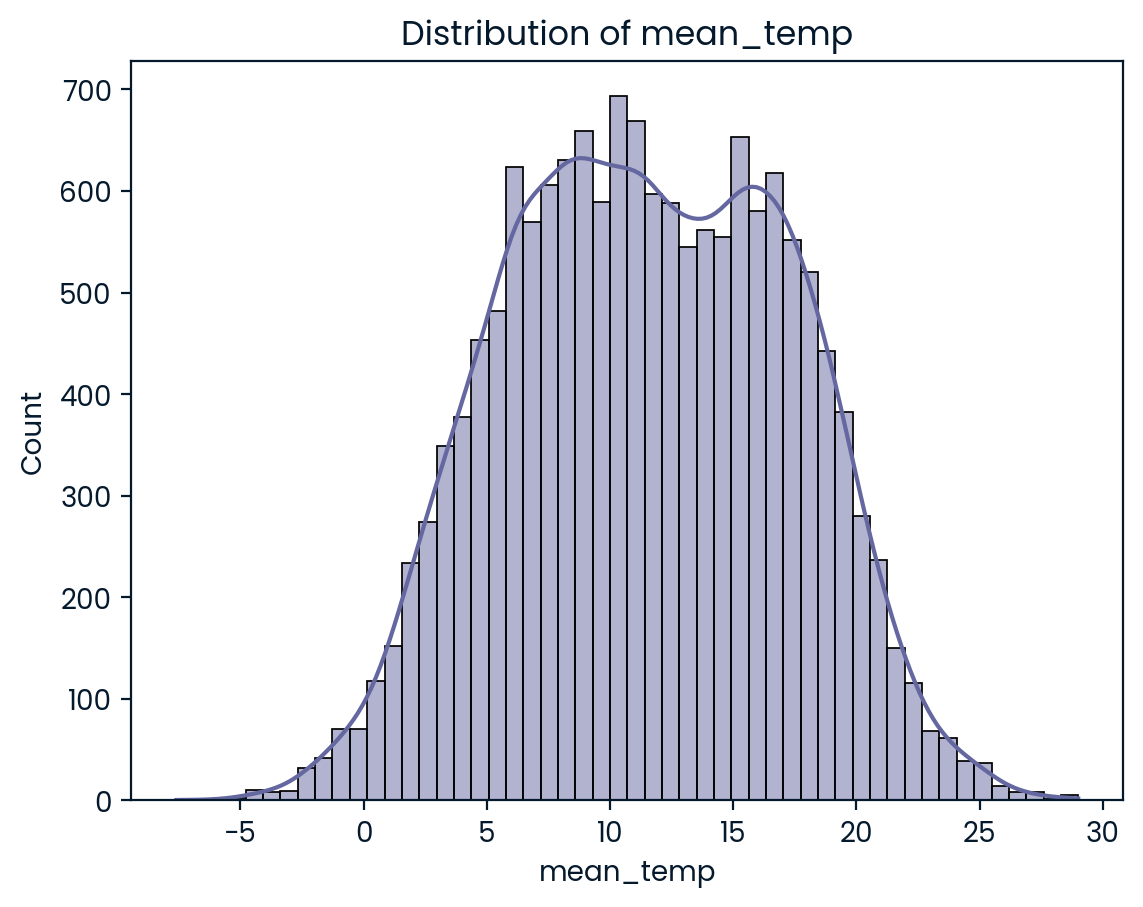

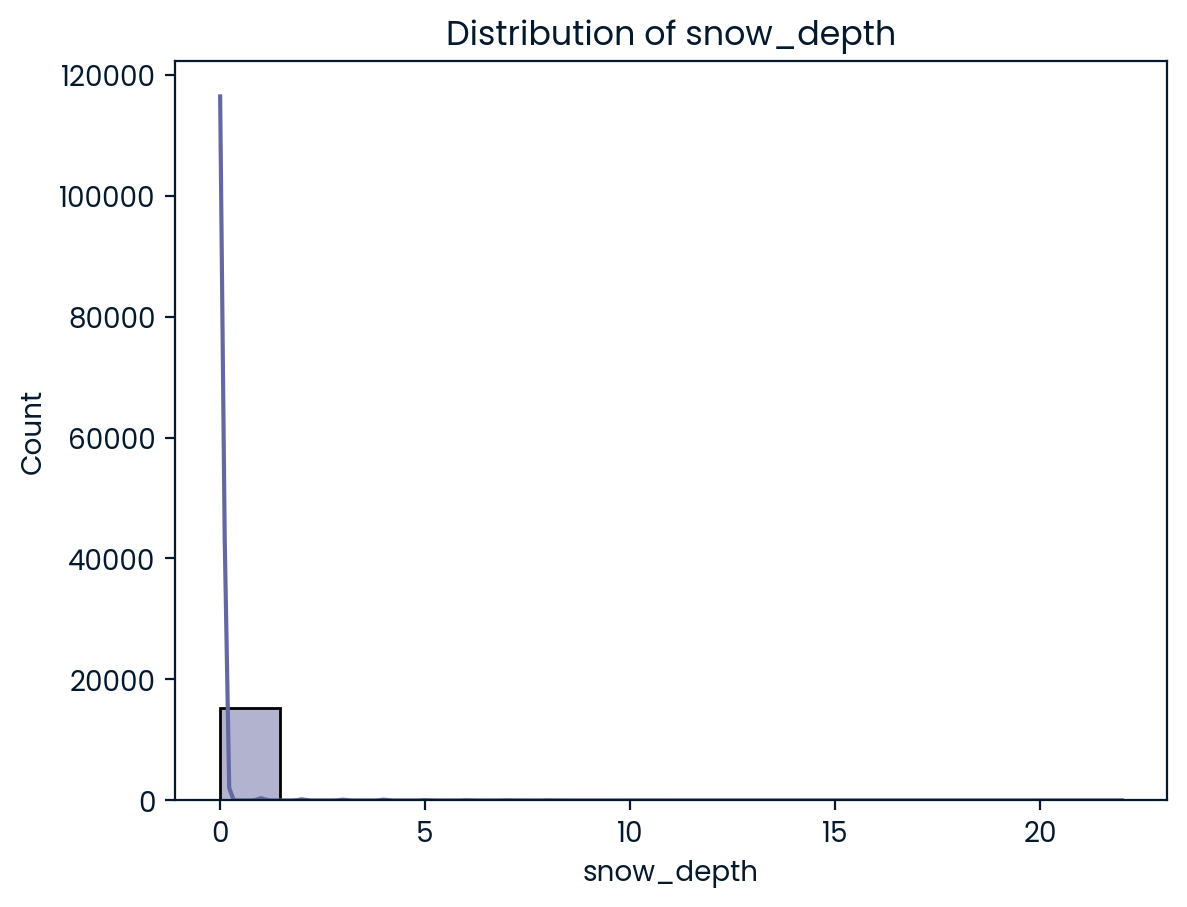

In [36]:
# Handle missing values
# Decide whether to drop, impute, or fill missing values.
# Example: For now, let's fill missing values with the mean for simplicity.
data.fillna(data.mean(), inplace=True)

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Visualize distributions
# Use histograms or boxplots to check for outliers and understand the spread.
for column in ['cloud_cover', 'sunshine', 'mean_temp', 'snow_depth']:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [37]:
# Drop the 'snow_depth' column
data.drop(columns=['snow_depth'], inplace=True)

# Drop rows where the target variable ('mean_temp') is missing
data = data.dropna(subset=['mean_temp'])

# Impute missing values in predictors with the mean
for column in ['cloud_cover', 'global_radiation', 'max_temp', 'min_temp', 'precipitation', 'pressure']:
    data[column].fillna(data[column].mean(), inplace=True)

# Verify that there are no remaining missing values
print(data.isnull().sum())


date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
dtype: int64


In [38]:
from sklearn.model_selection import train_test_split

# Define predictors (X) and target (y)
X = data.drop(columns=['mean_temp', 'date'])  # Exclude the target and date columns
y = data['mean_temp']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (12272, 7)
Testing set shape: (3069, 7)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Baseline Linear Regression RMSE: {rmse:.2f}")


Baseline Linear Regression RMSE: 0.92


In [40]:
import mlflow
import mlflow.sklearn

# Start an MLflow run
with mlflow.start_run():
    # Train the model (Linear Regression in this case)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Log the model and metrics in MLflow
    mlflow.log_param("model_type", "Linear Regression")
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(model, "model")

    print(f"Logged Linear Regression with RMSE: {rmse:.2f}")


Logged Linear Regression with RMSE: 0.92


In [41]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the models to experiment with
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Iterate through the models and log each experiment
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Log the model type, hyperparameters, and RMSE
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("rmse", rmse)
        mlflow.sklearn.log_model(model, "model")
        
        print(f"Logged {model_name} with RMSE: {rmse:.2f}")


Logged Random Forest with RMSE: 0.92
Logged Gradient Boosting with RMSE: 0.90


In [42]:
# Query all MLflow runs
experiment_results = mlflow.search_runs()
print(experiment_results[['run_id', 'metrics.rmse', 'params.model_type']])


                              run_id  metrics.rmse  params.model_type
0   240441d22357419a9e1791e4286b352a      0.904608  Gradient Boosting
1   406341c3f868401db8ecf1d130e78ffc      0.919817      Random Forest
2   1b3763498314451d96fe3f454f68eeb1      0.916583  Linear Regression
3   6ad362a1580148f482dd0f658f567f90      0.897436               None
4   eacc0592d532407ca49afbfe293fb3be      0.904608  Gradient Boosting
5   af9b37715eac4e24bfb9315f803950f4      0.919817      Random Forest
6   7a3180a16d384805854c840736f88622      0.916583  Linear Regression
7   e778758dd33040babad98d459a8852fa      0.897436               None
8   1f85784f344c4c7daf11801d37ad70eb      0.904608  Gradient Boosting
9   d071e653dbf84adfb96c1b678f1e2e2f      0.919817      Random Forest
10  f0c0abda04fd4d949495877631e01ffe      0.916583  Linear Regression


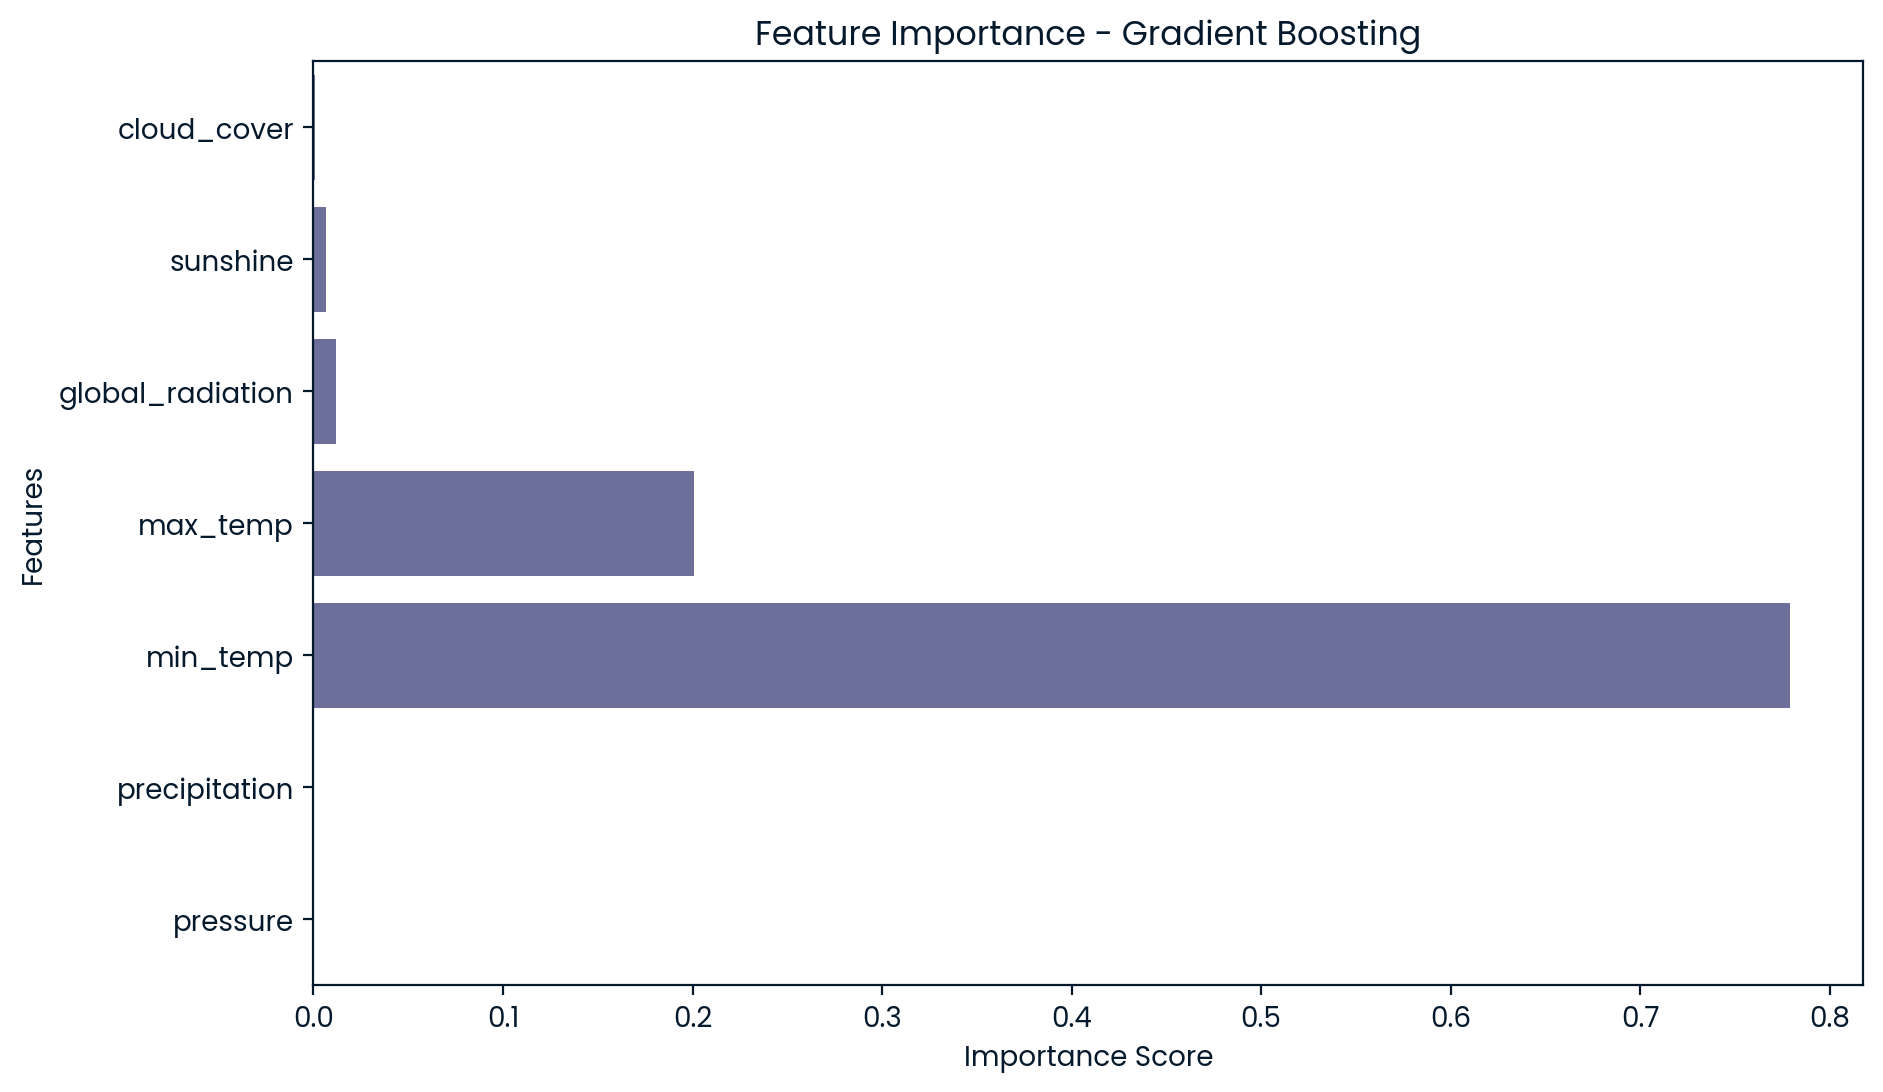

In [43]:
importances = models["Gradient Boosting"].feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Gradient Boosting
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 0.9, 1.0]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring="neg_mean_squared_error",
    cv=3,
    random_state=42
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Predict with the best model
y_pred_tuned = best_model.predict(X_test)

# Calculate RMSE
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Tuned Gradient Boosting RMSE: {rmse_tuned:.2f}")

# Log the tuned model in MLflow
with mlflow.start_run(run_name="Tuned Gradient Boosting"):
    mlflow.log_params(best_params)
    mlflow.log_metric("rmse", rmse_tuned)
    mlflow.sklearn.log_model(best_model, "model")
    print("Tuned model logged with MLflow.")


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Tuned Gradient Boosting RMSE: 0.90
Tuned model logged with MLflow.


In [45]:
import joblib

# Save the tuned Gradient Boosting model
model_filename = "tuned_gradient_boosting.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}.")


Model saved as tuned_gradient_boosting.pkl.


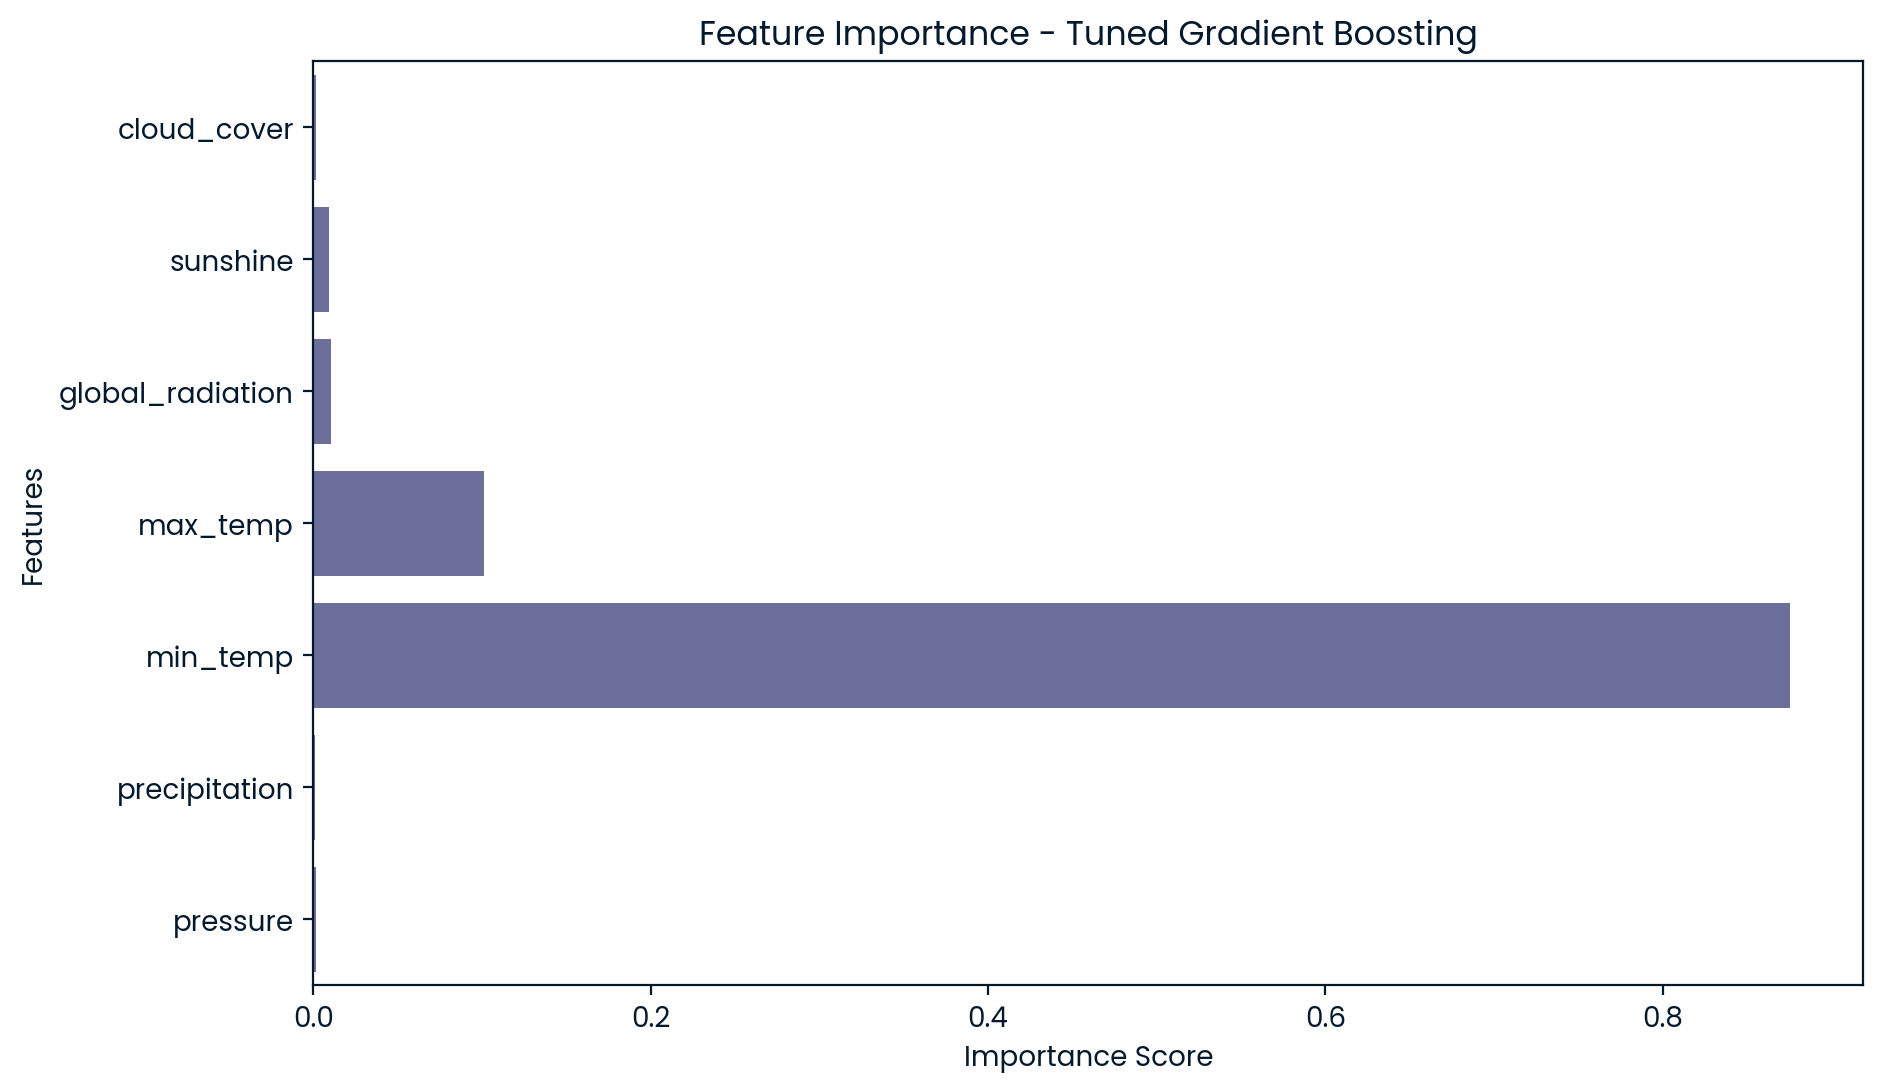

In [46]:
# Feature importance visualization
importances = best_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Tuned Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


London Weather Prediction with Machine Learning
Project Overview
This project focuses on building a machine learning pipeline to predict the mean temperature (°C) in London, England, based on various meteorological factors. As climate change impacts weather patterns, accurate temperature predictions are becoming increasingly important for businesses and decision-making. Using data from the london_weather.csv dataset, this project explores different regression models to achieve a Root Mean Squared Error (RMSE) ≤ 3, leveraging MLflow for experiment tracking.

Dataset
The dataset contains daily weather data, including:

Features:
cloud_cover (oktas), sunshine (hours), global_radiation (W/m²), max_temp (°C), min_temp (°C), precipitation (mm), pressure (Pa).
Target:
mean_temp (°C).
Size: 15,341 rows, 10 columns.
Data Preprocessing
Handling Missing Values:
Dropped rows with missing target values (mean_temp).
Imputed missing predictor values (cloud_cover, global_radiation, etc.) using the mean.
Excluded the snow_depth column due to significant missing data.
Feature Engineering:
Converted the date column into a datetime object for potential future analysis (though not directly used in modeling).
Methodology
1. Baseline Model
A Linear Regression model was trained as a baseline, achieving an RMSE of 0.92, demonstrating that the predictors have strong relationships with the target variable.

2. Advanced Models
Two advanced regression models were trained:

Random Forest Regressor: RMSE = 0.92.
Gradient Boosting Regressor: RMSE = 0.90.
Both models were logged and tracked using MLflow, including their hyperparameters and evaluation metrics.

3. Hyperparameter Tuning
Conducted hyperparameter tuning for the Gradient Boosting model using RandomizedSearchCV.
Optimized parameters:
n_estimators: 100
learning_rate: 0.1
max_depth: 5
subsample: 0.8
The tuned model maintained an RMSE of 0.90.
Results
Best Model: Gradient Boosting Regressor (tuned).
Performance: RMSE = 0.90 (well below the target of 3).
Feature Importance:
The most significant features were max_temp and min_temp, as expected.


Tools and Libraries
Python: Data processing and model development.
scikit-learn: Regression models, hyperparameter tuning.
MLflow: Experiment tracking and model management.
pandas, numpy: Data manipulation.
matplotlib, seaborn: Visualization.

Conclusion
This project demonstrates a comprehensive pipeline for predicting mean temperature using machine learning. The integration of advanced models, hyperparameter tuning, and experiment tracking with MLflow highlights a robust approach to weather prediction. The final tuned Gradient Boosting model achieves excellent accuracy, providing a valuable tool for temperature forecasting in London.

